### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [46]:
data = pd.read_csv('datasets/coupons.csv')

In [47]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [48]:
data2 = pd.read_csv('datasets/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [49]:
data['temperature'] = data['temperature'].astype(str)
# I Changed "temperature" column from an integer to a string. 
#This is because the temperatures can only fall into 3 categories so I prefer using a string to visualize it rather than an integer since the values aren't continuous.

data2=data.drop('car',axis=1)
survey=data2.dropna()
# I removed the "Car" column because it only has 108 results in the 12684 row dataset.
# I then removed all other rows with missing data so that all of our data is complete.


#This left me with a dataset with 12,079 completed rows and 25 columns.

survey.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  object
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [50]:
coupon = survey.loc[survey['Y']==1]['Y']
nocoupon = survey.loc[survey['Y']==0]['Y']
coupon.count() / nocoupon.count()
# The proportion of coupons to no coupons is 6877 to 5202 which creates a ratio of approximately 1.322 : 1
#so for every person who denied the coupon, 1.3 people accepted it. 

1.3219915417147252

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Coupon Status')

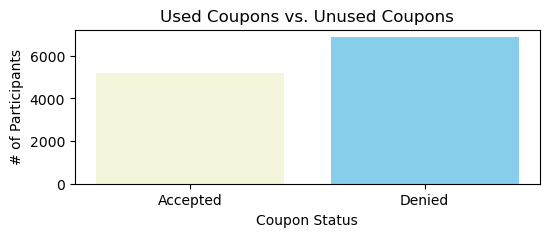

In [51]:
totalcoupons=survey['Y'].value_counts()
plt.figure(figsize=(6, 2))
plt.bar(totalcoupons.index, totalcoupons.values, color=['skyblue','beige'])
plt.title('Used Coupons vs. Unused Coupons')
plt.xticks(np.arange(0, 2, step=1), labels=['Accepted','Denied'])
plt.ylabel('# of Participants')
plt.xlabel('Coupon Status')




In [52]:
# this bar plot, of the coupon column, shows that more people denied the coupon than accepted it.

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature')

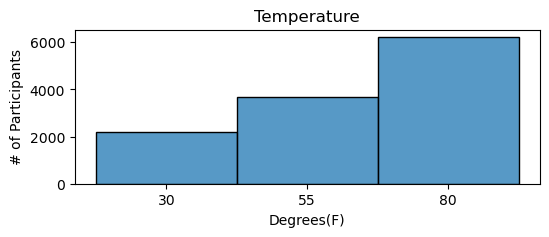

In [53]:
plt.figure(figsize=(6, 2))
sns.histplot(survey['temperature'].sort_values(ascending=True))
plt.xlabel('Degrees(F)')
plt.ylabel('# of Participants')
plt.title('Temperature')





In [54]:
#this visualization shows that as the temperature increased, more people participated in the survey
#This applies to any future reseach or studies - I reccomend planning to conduct the survey in warm temperatures


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [55]:
barcoupons= survey.loc[survey['coupon']=='Bar']
barcoupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [56]:
baraccepted=barcoupons.loc[barcoupons['Y']==1].count()
bardenied=barcoupons.loc[barcoupons['Y']==0].count()
baraccepted[['Y']]/ bardenied[['Y']]



# the proportion of accepted bar coupons to denied bar coupons is: .7004


Y    0.700444
dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


[Y    0.761658
 dtype: float64,
 Y    0.372674
 dtype: float64]

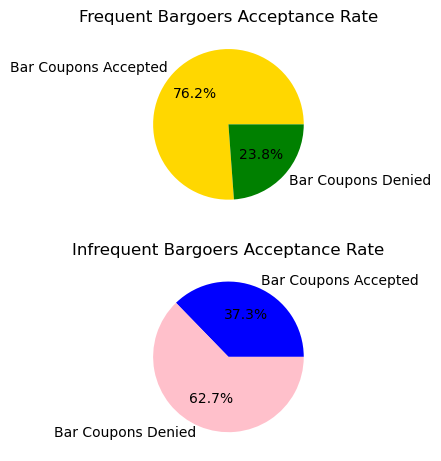

In [57]:
# below I will create two different queries, one to pull all of the people who went to the bar 3 or less times per month and then vice versa.

barcoupons['Bar'].value_counts()
list1=['4~8','gt8']
list2=['never','less1','1~3']
bar = barcoupons.query("Bar in @list1")
nobar = barcoupons.query("Bar in @list2")
baraccept = bar.loc[bar['Y'] == 1].count()
bardeny = bar.loc[bar['Y'] == 0].count()
bartotal = bar[['Y']].count()
nobaraccept= nobar.loc[nobar['Y'] == 1].count()
nobardeny= nobar.loc[nobar['Y'] == 0].count()
nobartotal= nobar[['Y']].count()


#now we have sepreated the people who accepted bar coupons that go to the bar 3 or less times per month from those who went 4+ times
#Below I will create ratios of the ['Y'] columnn for each of these groups, this will show the acceptance ratio for bar coupons for each group.
barratio = baraccept[['Y']]/ bartotal
nobarratio = nobaraccept[['Y']]/ nobartotal[['Y']]
[barratio, nobarratio]


# Below I will create 2 pie charts to showcase the acceptance rate for each group. 
piebar = float(baraccept.iloc[0])
piebar2 = float(bardeny.iloc[0])
pienobar = float(nobaraccept.iloc[0])
pienobar2  = float(nobardeny.iloc[0])
fig, (chart1, chart2)= plt.subplots(2,1)
plt.tight_layout()
chart1.pie([piebar,piebar2],labels=['Bar Coupons Accepted','Bar Coupons Denied'], autopct='%1.1f%%', colors=['gold','green'])
chart1.set_title('Frequent Bargoers Acceptance Rate')
chart2.pie([pienobar,pienobar2],labels=['Bar Coupons Accepted','Bar Coupons Denied'], autopct='%1.1f%%',colors=['blue','pink'])
chart2.set_title('Infrequent Bargoers Acceptance Rate')

[barratio, nobarratio]

# The acceptance rate for people who went to the bar more than 3 times a month was 76.2%
# The acceptance rate for people who went to the bar less than 3 times a month was 37.3%

# This shows that the frequency consumers visit a bar with has a huge affect on whether they will accept the bar coupon.
# people who go to the bar more than 3 times a month are much more likely to accept the bar coupon than people who go less than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [58]:

barcoupons['age'].value_counts()
list3 = ['26',    
'31',         
'50plus',     
'36',         
'41','46']
list4=['1~3','4~8','gt8']
list5=['never']

df10 = barcoupons.query("age in @list3 and Bar in @list4")
acceptancerate = df10['Y'].loc[df10['Y']==1].count() / df10[['Y']].count()

df12 = barcoupons.query("age not in @list3 and Bar not in @list4")
acceptancerate2 = df12['Y'].loc[df12['Y']==1].count() / df12[['Y']].count()
print([acceptancerate,acceptancerate2])

#The acceptance rate is 69.0% for drivers who go to the bar more than once a month and are over the age of 25
#The acceptance rate is 38.8% for drivers who go to the bar less than once a month and are under the age of 25
# people under the age of 25 who don't go to the bar more than once a month are much less likely to accept the bar coupon than vice versa

[Y    0.689826
dtype: float64, Y    0.38835
dtype: float64]


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Text(0.5, 1.0, 'Bar Coupon Acceptance Rate of White Collar Bargoers with passangers that are not a kid')

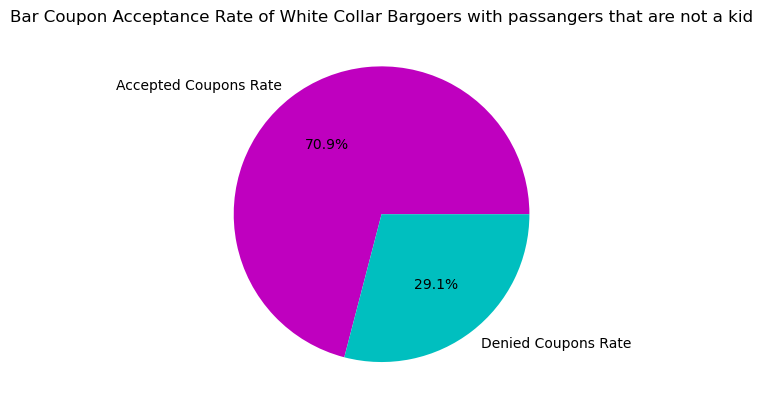

In [59]:
list4=['1~3','4~8','gt8']
list7 = ['Kid(s)']
list8=['Farming Fishing & Forestry']
query10=barcoupons.query("Bar in @list4 and passanger not in @list7 and occupation not in @list8")
nokidbargoerswhitecollar= query10['Y'].loc[query10['Y']==1].count() / query10['Y'].count()

plt.pie([nokidbargoerswhitecollar,(1-nokidbargoerswhitecollar)],labels=['Accepted Coupons Rate','Denied Coupons Rate'],autopct= '%1.1f%%',colors=['m','c'])
plt.title('Bar Coupon Acceptance Rate of White Collar Bargoers with passangers that are not a kid')
#The acceptance rate is 70.9% for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [60]:


list4=['1~3','4~8','gt8']
list5 = ['below21','21','26']
list6= ['4~8','gt8']
list7 = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']

# this function polls the bar coupons list and shows people who: go to bars more than once a month, had passengers that were not a kid, and were not widowed 
part1 = barcoupons.query("Bar in @list4 and passanger not in'Kid(s)'and maritalStatus not in 'Widowed'")[['Y']].value_counts().reset_index()
part1
answer1 = part1.iloc[0,1] / part1['count'].sum()*100

# this function polls the bar coupons list and shows people who:go to bars more than once a month and are under the age of 30
part2 = barcoupons.query('Bar in @list4 and age in @list5' )[['Y']].value_counts().reset_index()
answer2 = part2.iloc[0,1] / part2['count'].sum()*100
answer2

#go to cheap restaurants more than 4 times a month and income is less than 50K.
part3=barcoupons.query('RestaurantLessThan20 in @list6 and income in @list7')[['Y']].value_counts().reset_index()
answer3= part3.iloc[0,1] / part3['count'].sum()*100
answer1 = answer1.round(2)
answer2= answer2.round(2)
answer3 = answer3.round(2)


print([answer1,answer2, answer3])



#The acceptance rate of bar coupons is 70.9% for drivers who go to bars more than once a month and had passengers that were not a kid and were not widowed.
#The acceptance rate of bar coupons is 72% for drivers who go to bars more than once a month and are under the age of 30
#The acceptance rate of bar coupons is 54.3% for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50k


[70.94, 71.95, 54.35]


In [61]:
# i will now round the answers so we have compact labels in the visualization
answer1 = answer1.round(1)
answer2= answer2.round(1)
answer3 = answer3.round(1)

(0.0, 100.0)

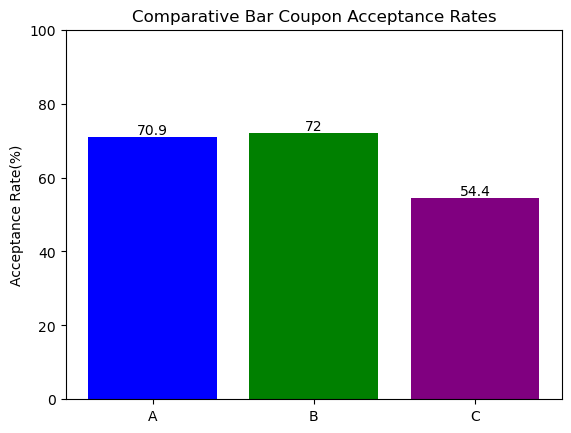

In [63]:
plt.bar_label(plt.bar(['A','B','C'],[answer1,answer2,answer3],color = ['blue','green', 'purple']))
plt.ylabel('Acceptance Rate(%)')
plt.title('Comparative Bar Coupon Acceptance Rates')
plt.ylim(0,100)


In [73]:
#I hypothesize that people who accepted bar coupons tend to have younger people who visit bars frequently and probably don't have children.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [66]:
# I am going to explore the Coffee House group.
survey[['coupon']].value_counts()
coffee = survey.loc[survey['coupon']=='Coffee House']
coffee['gender'].value_counts()

gender
Female    1969
Male      1847
Name: count, dtype: int64

In [67]:
# I will check to see the acceptance rate of coffee coupons for males vs. females
# I will also check to see how marital status and passanger types affect the acceptance rate of coffee coupons
#First analysis will be acceptance rate by gender
#Second part will analyze the acceptance rate of people who have never been married with a passanger that is not a kid compared to to people who have been married with kids as their passanger


In [68]:
male = coffee.query("gender in 'Male'")[['Y']].value_counts().reset_index()
female = coffee.query("gender in 'Female'")[['Y']].value_counts().reset_index()
maleacceptancerate = male.iloc[0,1] / male['count'].sum()*100
femaleacceptancerate = female.iloc[0,1] / female['count'].sum()*100
maleacceptancerate = maleacceptancerate.round(2)
femaleacceptancerate = femaleacceptancerate.round(2)
[maleacceptancerate , femaleacceptancerate]

# Male's and Female's accepted the CoffeeHouse coupon at almost an identical rate of about 50%. The gender of the person seems to not have much of an affect on them accepting the coffeehouse coupon.


[50.19, 50.89]

(0.0, 100.0)

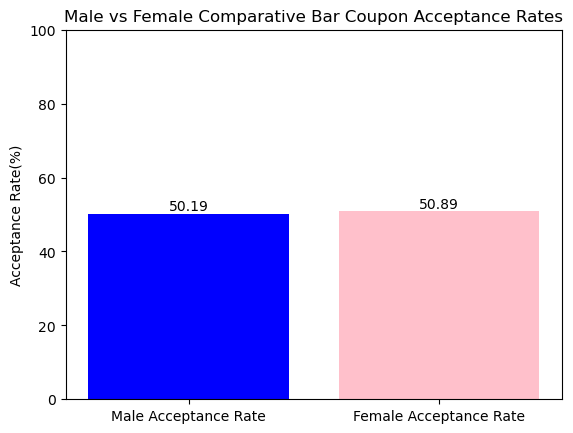

In [69]:
plt.bar_label(plt.bar(['Male Acceptance Rate','Female Acceptance Rate'],[maleacceptancerate,femaleacceptancerate],color=['blue','pink']))
plt.title('Coffee Coupon Acceptance Rate by Gender')
plt.ylabel('Acceptance Rate(%)')
plt.title('Male vs Female Comparative Bar Coupon Acceptance Rates')
plt.ylim(0,100)

In [70]:
[coffee['maritalStatus'].value_counts(),coffee['passanger'].value_counts()]
list1= ['Single', 'Unmarried partner']
list2= ['Kid(s)']

nevermarried = coffee.query('maritalStatus in @list1 and passanger not in @list2')[['Y']].value_counts().reset_index()
married = coffee.query('passanger in @list2')[['Y']].value_counts().reset_index()

nevermarried
married

,Y,count
0,0,102
1,1,91


Text(0.5, 1.0, 'Coffee Coupon Acceptance Rate among Participants who have been Married and Have kids as their Passenger')

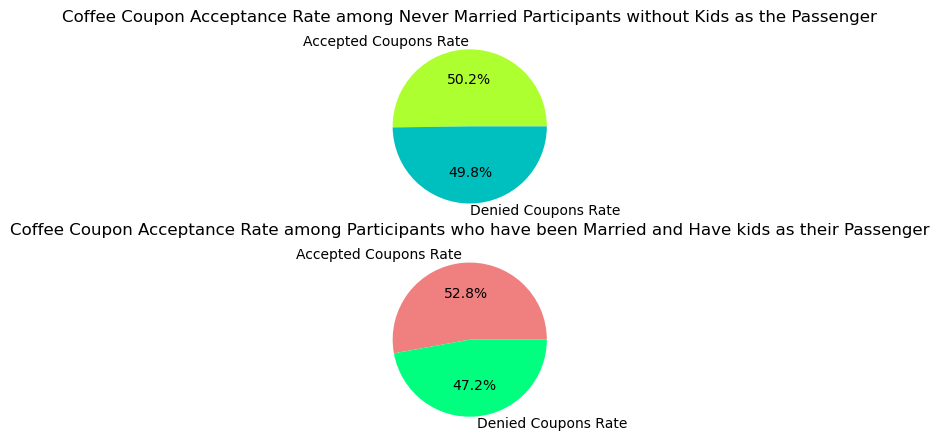

In [71]:
nevermarriedacceptancerate = nevermarried.iloc[0,1] / nevermarried['count'].sum()
marriedacceptancerate = married.iloc[0,1] / married['count'].sum()
[nevermarriedacceptancerate,marriedacceptancerate]

fig, (status, status2)= plt.subplots(2,1)
status.pie([nevermarriedacceptancerate,(1-nevermarriedacceptancerate)],labels=['Accepted Coupons Rate','Denied Coupons Rate'], autopct = '%1.1f%%',colors=['greenyellow','c'])
status.set_title('Coffee Coupon Acceptance Rate among Never Married Participants without Kids as the Passenger')
plt.tight_layout()
status2.pie([marriedacceptancerate,(1-marriedacceptancerate)],labels=['Accepted Coupons Rate','Denied Coupons Rate'], autopct = '%1.1f%%',colors=['lightcoral','springgreen'])
status2.set_title('Coffee Coupon Acceptance Rate among Participants who have been Married and Have kids as their Passenger')

# People who were not married before and who did not have a kid as the passanger had a coffeehouse coupon of 50.2%
# Being married before and passanger being a child had a coffehouse coupon acceptance rate of 52.8%
#There seems to be little coorelation between marital status/ passanger type and accepting the coupon, but married people with children as their passanger are slightly more likely to accept the coupon than if the conditions were vice versa.

In [74]:
#We didn't learn from our analysis much about which people are most likely to accept the Coffee coupon, 
#We did learn that certain factors like age, marital status and gender seem to have little effect on the acceptance rate.
# RECCOMENDATIONS:
#I reccomend that we partner with bars around the city to distribute these coupons.
#We saw the people were much more likely to accept the bar coupon if they went to the bar frequently.
#This would mean that if we were to target bars we should have an extremely high rate of acceptance 
#This in turn would hopefully drive a high volume of coupon acceptance and usage.